In [1]:
from datatools import Tool, Config, MeasurementSeries, Measurement, DataTypes, Action
from datatools import ACC, GYR, MAG, MIC, POS, VEL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
source = "./tool-tracking-data/"

from datatools import MeasurementDataReader, Measurement, MeasurementSeries, Action
mdr = MeasurementDataReader(source=source)

q = mdr.query(query_type=Measurement)

mytool = "electric_screwdriver"

data_dict = q.filter_by(Tool == mytool, DataTypes == [ACC, GYR, MIC, MAG]).get()

[INFO] Read data:   0%|                                                                                                                 | 0/16 [00:00<?, ?it/s]

[INFO] Preparing data from:
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716


[INFO] Read data:   6%|█████                                                                           | 1/16 [00:00<00:04,  3.39it/s, file=ACC-01-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-01-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  12%|██████████                                                                      | 2/16 [00:00<00:04,  3.44it/s, file=ACC-02-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-02-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  19%|███████████████                                                                 | 3/16 [00:00<00:03,  3.65it/s, file=ACC-03-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-03-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  25%|████████████████████                                                            | 4/16 [00:01<00:03,  3.80it/s, file=ACC-04-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-04-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  31%|█████████████████████████                                                       | 5/16 [00:01<00:02,  3.97it/s, file=GYR-01-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-01-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  44%|███████████████████████████████████                                             | 7/16 [00:01<00:02,  4.25it/s, file=GYR-03-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-02-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-03-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  50%|████████████████████████████████████████                                        | 8/16 [00:01<00:01,  4.60it/s, file=GYR-04-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-04-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  56%|█████████████████████████████████████████████                                   | 9/16 [00:02<00:01,  3.92it/s, file=MAG-01-155.087.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-01-155.087.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  62%|█████████████████████████████████████████████████▍                             | 10/16 [00:02<00:01,  3.52it/s, file=MAG-02-154.679.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-02-154.679.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  69%|██████████████████████████████████████████████████████▎                        | 11/16 [00:02<00:01,  3.40it/s, file=MAG-03-154.871.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-03-154.871.csv) and from the timestamps differ by 0.002Hz



[INFO] Read data:  75%|███████████████████████████████████████████████████████████▎                   | 12/16 [00:03<00:01,  3.50it/s, file=MAG-04-154.967.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-04-154.967.csv) and from the timestamps differ by 0.001Hz



[INFO] Read annotation: 100%|█████████████████████████████████████████████████████████████████████████| 16/16 [00:21<00:00,  1.36s/it, file=data-04.annotation]


[INFO] Finished with 4 measurement(s).


In [2]:
# note: this uses data from only one measurement, we probably want to concatenate them all eventually
measurement_campagne = "01"
acc = pd.DataFrame(data_dict.get(measurement_campagne).acc)
gyr = pd.DataFrame(data_dict.get(measurement_campagne).gyr)
mic = pd.DataFrame(data_dict.get(measurement_campagne).mic)
mag = pd.DataFrame(data_dict.get(measurement_campagne).mag)

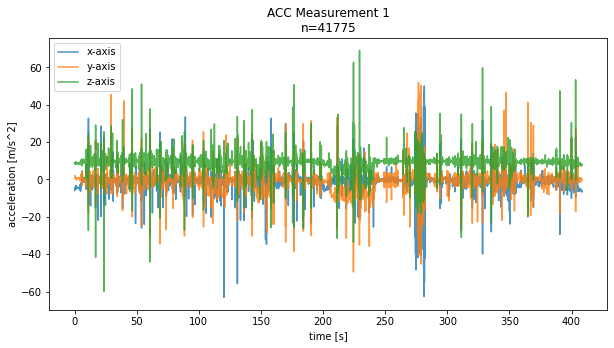

In [3]:
acc_time_norm = acc["time [s]"] - acc["time [s]"].min()
fig, ax = plt.subplots(1, figsize=(10,5))
for dim in "xyz":
    dim_name = dim+"-axis"
    ax.plot(acc_time_norm, acc["acceleration "+dim_name+" [m/s^2]"], label=dim_name, alpha=0.8)
ax.set_title("ACC Measurement 1\nn="+str(acc.shape[0]))
ax.set_xlabel("time [s]")
ax.set_ylabel("acceleration [m/s^2]")
ax.legend()
plt.show()

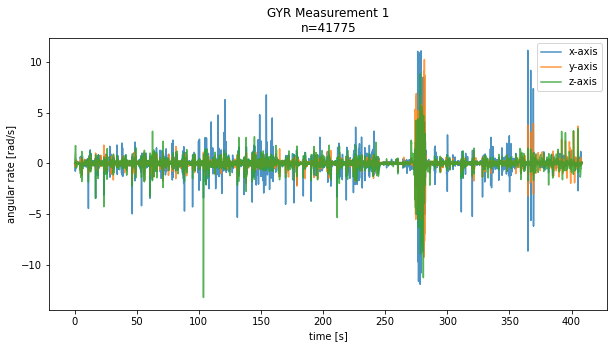

In [4]:
gyr_time_norm = gyr["time [s]"] - gyr["time [s]"].min()
fig, ax = plt.subplots(1, figsize=(10,5))
for dim in "xyz":
    dim_name = dim+"-axis"
    ax.plot(gyr_time_norm, gyr["angular rate "+dim_name+" [rad/s]"], label=dim_name, alpha=0.8)
ax.set_title("GYR Measurement 1\nn="+str(gyr.shape[0]))
ax.set_xlabel("time [s]")
ax.set_ylabel("angular rate [rad/s]")
ax.legend()
plt.show()

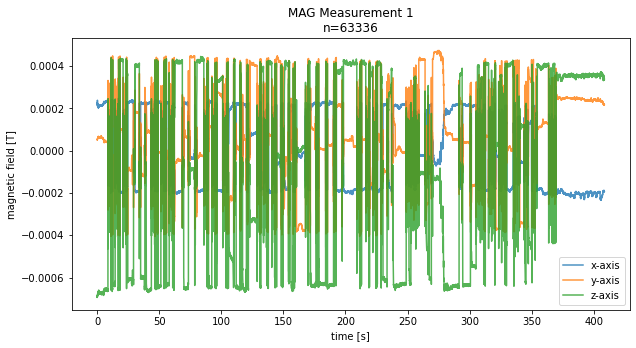

In [5]:
mag_time_norm = mag["time [s]"] - mag["time [s]"].min()
fig, ax = plt.subplots(1, figsize=(10,5))
for dim in "xyz":
    dim_name = dim+"-axis"
    ax.plot(mag_time_norm, mag["magnetic field "+dim_name+" [T]"], label=dim_name, alpha=0.8)
ax.set_title("MAG Measurement 1\nn="+str(mag.shape[0]))
ax.set_xlabel("time [s]")
ax.set_ylabel("magnetic field [T]")
ax.legend()
plt.show()

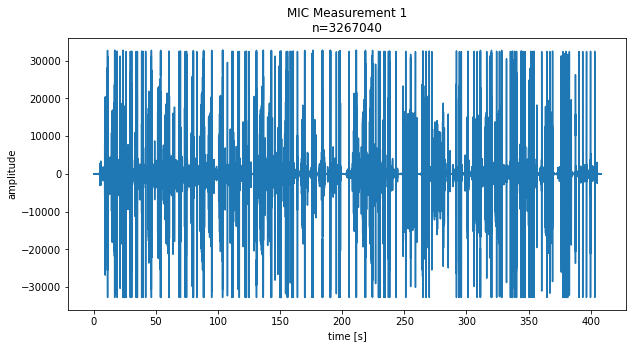

In [6]:
mic_time_norm = mic["time [s]"] - mic["time [s]"].min()
fig, ax = plt.subplots(1, figsize=(10,5))
ax.plot(mic_time_norm, mic.amplitude)
ax.set_title("MIC Measurement 1\nn="+str(mic.shape[0]))
ax.set_xlabel("time [s]")
ax.set_ylabel("amplitude")
plt.show()

# Upsample to MIC frequency
* Note. ACC and GYR have the same frequency
* MAG and MIC make more observations in the same timespan

In [7]:
def combine_sensors(reference_data, others):
    """combine dataframes of data frome different sensors.
    Resample all entries to the frequency of reference_data.
    """
    data = reference_data.copy()
    for df in others:
        data = pd.merge_asof(data, df, left_on="time [s]", right_on="time [s]", direction="nearest")
    data = data.loc[:,~data.columns.duplicated()]
    data["label"] = data["label_x"]
    del data["label_x"]
    del data["label_y"]
    
    return data

In [16]:
data_high_freq = combine_sensors(mic, [acc, gyr, mag])

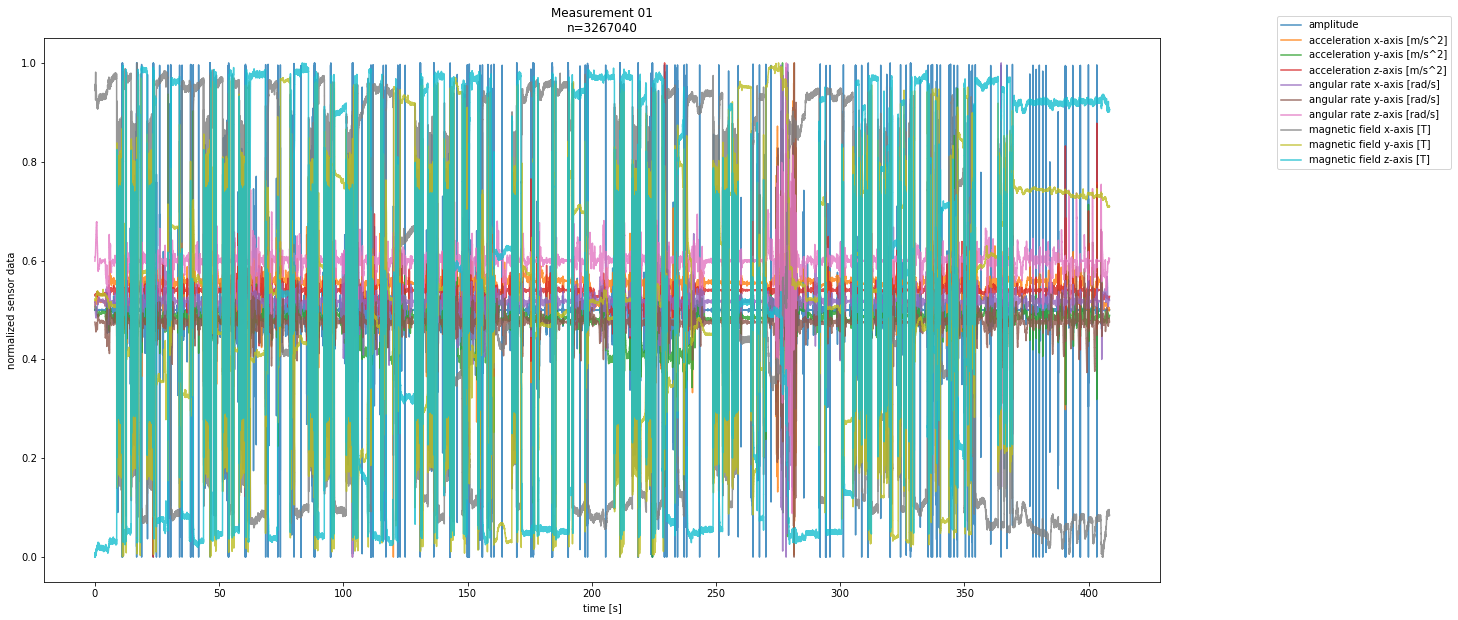

In [17]:
time_norm = data_high_freq["time [s]"] - data_high_freq["time [s]"].min()
fig, ax = plt.subplots(1, figsize=(20,10))
for i, col in enumerate(data_high_freq.columns):
    if col in ["time [s]", "label"]: continue
    # normalize data for plotting
    y_norm =  (data_high_freq[col] - data_high_freq[col].min()) / (data_high_freq[col].max() - data_high_freq[col].min())
    ax.plot(time_norm, y_norm, label=col, alpha=0.8)
ax.set_title("Measurement "+measurement_campagne + "\nn="+str(data_high_freq.shape[0]))
ax.set_xlabel("time [s]")
ax.set_ylabel("normalized sensor data")
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

# Downsample to ACC frequency

In [10]:
data_low_freq = combine_sensors(acc, [gyr, mag, mic])

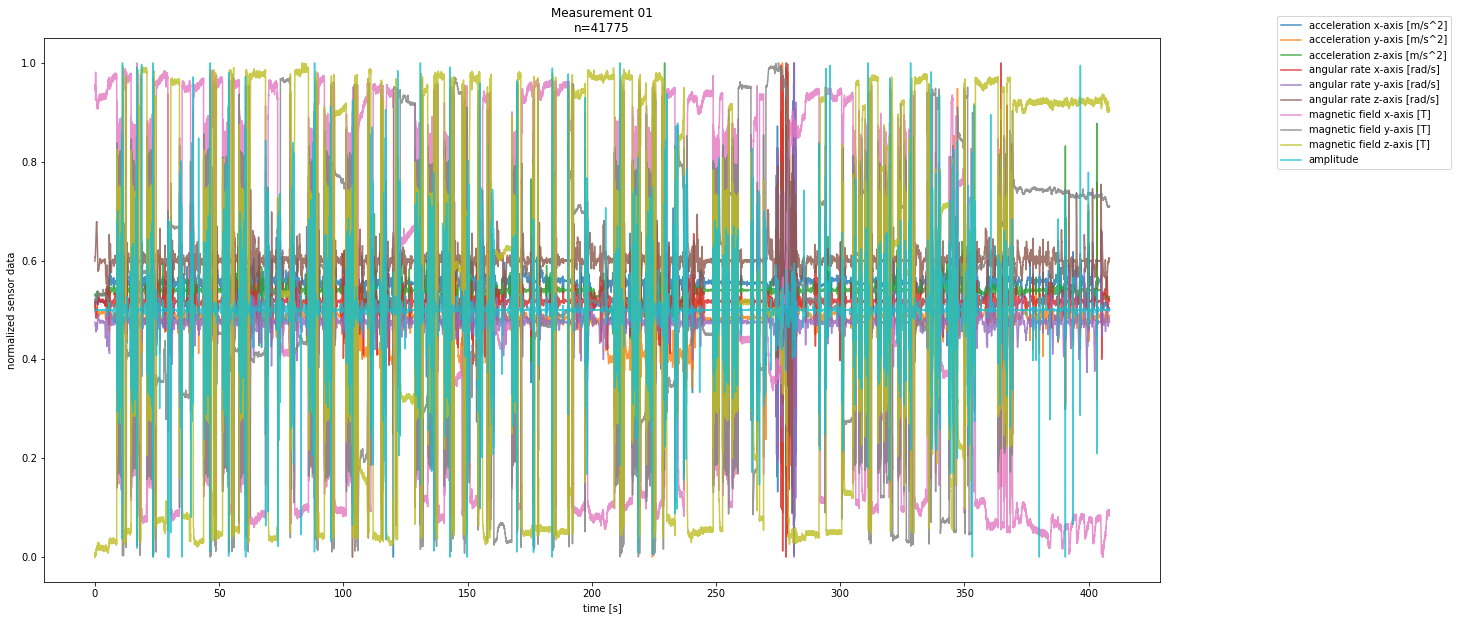

In [14]:
time_norm = data_low_freq["time [s]"] - data_low_freq["time [s]"].min()
fig, ax = plt.subplots(1, figsize=(20,10))
for i, col in enumerate(data_low_freq.columns):
    if col in ["time [s]", "label"]: continue
    # normalize data for plotting
    y_norm =  (data_low_freq[col] - data_low_freq[col].min()) / (data_low_freq[col].max() - data_low_freq[col].min())
    ax.plot(time_norm, y_norm, label=col, alpha=0.8)
ax.set_title("Measurement "+measurement_campagne + "\nn="+str(data_low_freq.shape[0]))
ax.set_xlabel("time [s]")
ax.set_ylabel("normalized sensor data")
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()